# World Happiness Index: Multiple Linear Regression

## 1- Which features could explain our linear model predicting World Happiness Index?

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# reading csv file

path= 'C:/Users/vanes/OneDrive/Documentos/PROJETOS_PORTFOLIO/PYTHON/Best_Countries_Live/best_countries_live.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
0,1441719852,0.00916,3287590,India,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
1,1425178782,-0.00035,9706961,China,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
2,341814420,0.00535,9372610,United States,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
3,279798049,0.00816,1904569,Indonesia,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
4,245209815,0.01964,881912,Pakistan,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516


In [4]:
df.describe()

,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
count,1.410000e+02,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.422157e+07,0.009327,8.734306e+05,272.742080,706.401985,0.737199,0.737596,5.542582
std,1.749363e+08,0.012112,2.200180e+06,945.620017,2449.155844,0.153844,0.152319,1.105247
min,3.776890e+05,-0.030870,3.160000e+02,2.243100,5.809600,0.394000,0.397000,2.404000
25%,5.494963e+06,0.001180,6.455900e+04,37.367300,96.781300,0.607000,0.610000,4.744000
50%,1.171577e+07,0.008920,2.383910e+05,87.135400,225.680700,0.754000,0.756000,5.578000
75%,3.910705e+07,0.018230,6.522300e+05,170.267800,440.993500,0.875000,0.871000,6.293000
max,1.441720e+09,0.038090,1.709824e+07,8429.956800,21833.588200,0.962000,0.959000,7.821000


In [5]:
df.columns

Index(['population_2024', 'population_growthRate', 'land_area', 'country',
       'region', 'unMember', 'population_density', 'population_densityMi',
       'share_borders', 'Hdi2021', 'Hdi2020', 'WorldHappiness2022'],
      dtype='object')

In [6]:
# columns types

df.dtypes

population_2024            int64
population_growthRate    float64
land_area                  int64
country                   object
region                    object
unMember                    bool
population_density       float64
population_densityMi     float64
share_borders             object
Hdi2021                  float64
Hdi2020                  float64
WorldHappiness2022       float64
dtype: object

We are going to drop the columns: population_2024, country, region, population_density, shared_borders, hdi_2020 because these features are not of interest to us for predicting the World Happiness Index. Another decision was to drop population and population_density because there is another feature that provides us with the same information.

In [7]:
# creating a dataframe copy

df_copy = df.copy()

# drop the columns

df_copy = df_copy.drop(columns=['population_2024','country','region','population_density','share_borders'])



In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_growthRate  141 non-null    float64
 1   land_area              141 non-null    int64  
 2   unMember               141 non-null    bool   
 3   population_densityMi   141 non-null    float64
 4   Hdi2021                141 non-null    float64
 5   Hdi2020                141 non-null    float64
 6   WorldHappiness2022     141 non-null    float64
dtypes: bool(1), float64(5), int64(1)
memory usage: 6.9 KB


In [9]:
df_copy.describe()

,population_growthRate,land_area,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
count,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000
mean,0.009327,8.734306e+05,706.401985,0.737199,0.737596,5.542582
std,0.012112,2.200180e+06,2449.155844,0.153844,0.152319,1.105247
min,-0.030870,3.160000e+02,5.809600,0.394000,0.397000,2.404000
25%,0.001180,6.455900e+04,96.781300,0.607000,0.610000,4.744000
50%,0.008920,2.383910e+05,225.680700,0.754000,0.756000,5.578000
75%,0.018230,6.522300e+05,440.993500,0.875000,0.871000,6.293000
max,0.038090,1.709824e+07,21833.588200,0.962000,0.959000,7.821000


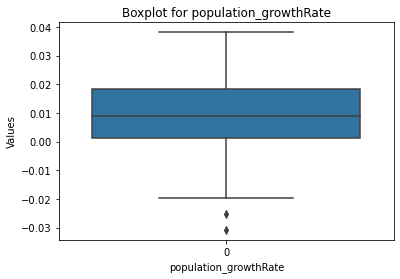

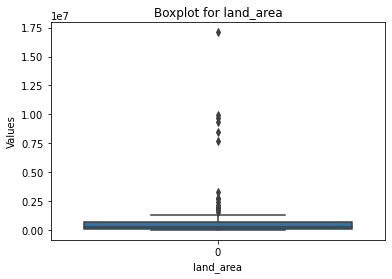

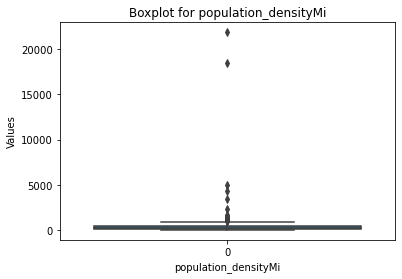

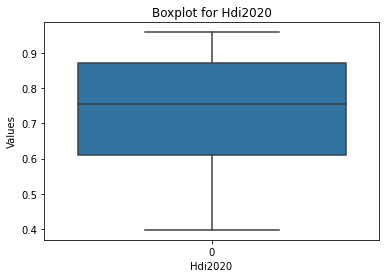

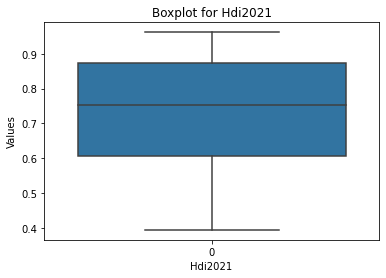

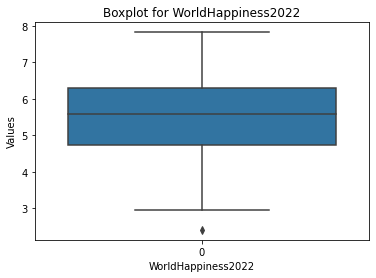

In [10]:

df_columns = ['population_growthRate', 'land_area', 'population_densityMi', 'Hdi2020', 'Hdi2021', 'WorldHappiness2022']

for i in df_columns:
    figure, ax = plt.subplots()
    sns.boxplot(data=df[i])
    ax.set_xlabel(i)
    ax.set_ylabel('Values')
    ax.set_title('Boxplot for {}'.format(i))
    plt.show()



In two boxplots, there is a presence of many outliers. For now, we will choose to remove these variables from our model. If necessary, we will consider them again and make transformations to reduce the impact of outliers on the prediction model.

Therefore, we will remove the variables: land_area and population_densityMi.

In [11]:
df_copy['unMember'].value_counts()

True     140
False      1
Name: unMember, dtype: int64

Here we can see that we have only one country that is not a member of the United Nations. We will remove this variable from the model for this reason. We don't have enough data between the two groups to perform the necessary analyses.

In [12]:
df_model = df_copy.drop(columns=['population_densityMi','land_area', 'unMember'])
df_model.dtypes

population_growthRate    float64
Hdi2021                  float64
Hdi2020                  float64
WorldHappiness2022       float64
dtype: object

## features vc target

We will check how the features are correlated with the target.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


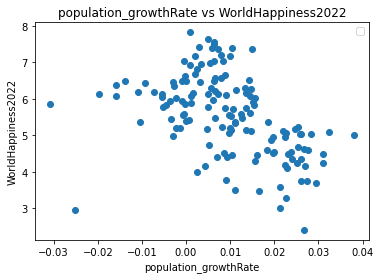

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


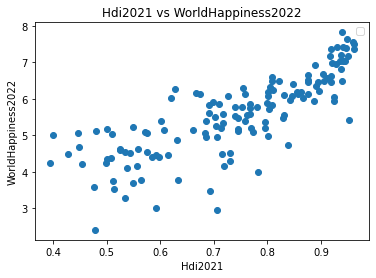

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


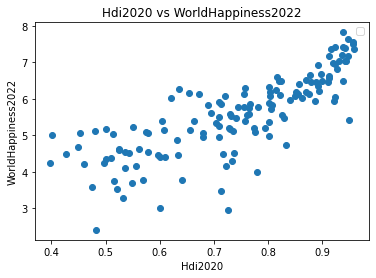

In [13]:
y = 'WorldHappiness2022'
x = df_model.select_dtypes(include=['float64'])

for i in x:
    if i != y:
        figure, ax = plt.subplots()
        ax.scatter(df_copy[i], df_copy[y])
        
        ax.set_xlabel(i)
        ax.set_ylabel(y)
        ax.set_title('{} vs {}'.format(i, y))
        
        ax.legend()
        
        plt.show()

It appears that there is some linear correlation between the features and our target. However, in the first graph, there is not a perfect linear correlation. We can use a line to approximate our data.

## features vs features

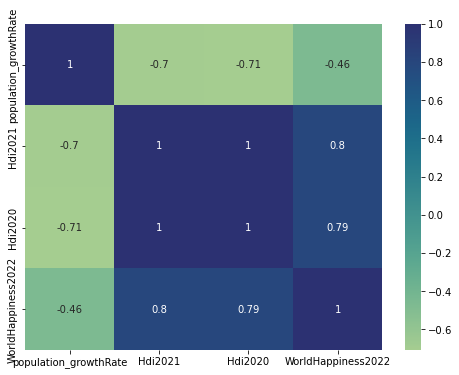

In [14]:
corr = df_model.corr()
plt.figure(figsize =(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap='crest')
plt.show()

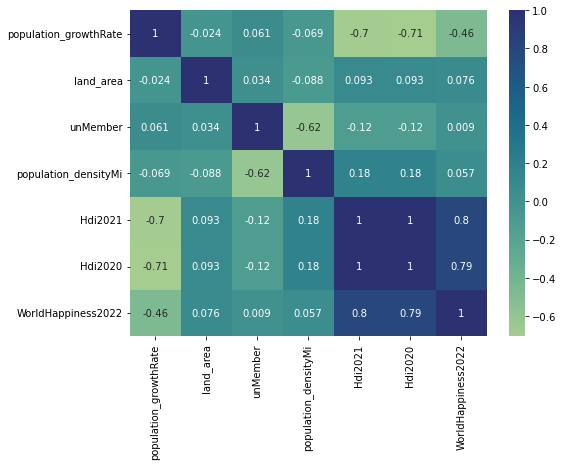

In [15]:
corr = df_copy.corr()
plt.figure(figsize =(8,6))
sns.heatmap(df_copy.corr(), annot=True, cmap='crest')
plt.show()

Comparing the two heatmaps depicting the correlation between the features, we can observe that the highest correlations are between 'population_growthRate', 'Hdi2021', 'Hdi2020', and 'WorldHappiness2022'. However, 'Hdi2020' and 'Hdi2021' exhibit a perfect correlation. Therefore, we will drop 'Hdi2020' to avoid multicollinearity between the features.

In [16]:
df_model = df_model.drop(columns=['Hdi2020'])
df_model

,population_growthRate,Hdi2021,WorldHappiness2022
0,0.00916,0.633,3.777
1,-0.00035,0.768,5.585
2,0.00535,0.921,6.977
3,0.00816,0.705,5.240
4,0.01964,0.544,4.516
...,...,...,...
136,0.01823,0.558,4.609
137,0.01043,0.930,7.404
138,-0.00061,0.832,5.547
139,0.00313,0.918,6.447


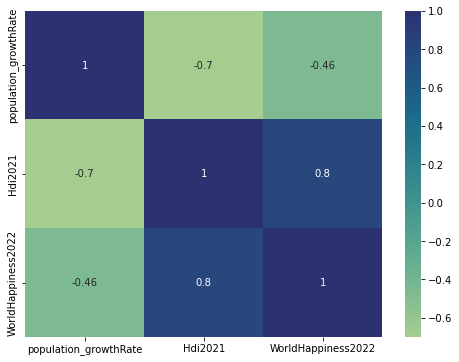

In [17]:
corr = df_model.corr()
plt.figure(figsize =(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap='crest')
plt.show()

Here we see that the variable 'Hdi2021' has a high correlation with 'population_growthRate' (in absolute terms). This may lead to multicollinearity. Since the correlation is not perfect, it may still contribute positively to the model. We will evaluate the model's performance with both variables and without one of them to determine the best option.

## Assumptions for regression

### 1) Linearity

It was done above.

### 2) Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_model[['population_growthRate','Hdi2021']]
vif = pd.DataFrame()
vif['variable']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

,variable,VIF
0,population_growthRate,1.309312
1,Hdi2021,1.309312


All of the VIFs are less than 5. This indicates that these features are not highly correlated with each other.

We are going to fit our model using these two features.

In [33]:
# create the model

mod = smf.ols(formula= 'WorldHappiness2022 ~ Hdi2021 + population_growthRate', data= df_model)

# apply the model in dataset

res = mod.fit()

### 3) Homoscedasticity

We are interested to check if the error term has a population mean of zero.

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

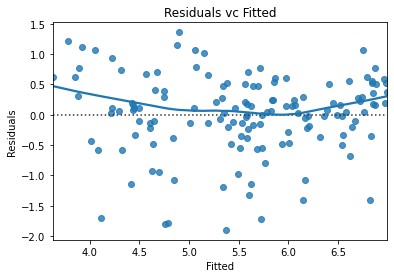

In [34]:
y = df_model['WorldHappiness2022']
fig, ax = plt.subplots(1,1)

sns.residplot(res.fittedvalues, res.resid, lowess=True) #lowess shows the continuous blue line
ax.title.set_text('Residuals vc Fitted')
ax.set(xlabel = 'Fitted', ylabel='Residuals')

### Log transformation

In [35]:
df_model['log_WorldHappiness2022'] = np.log(df_model['WorldHappiness2022'])

# create the new model

mod1 = smf.ols(formula= 'log_WorldHappiness2022 ~ population_growthRate + Hdi2021', data= df_model)

# apply the model in dataset

res1 = mod1.fit()

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

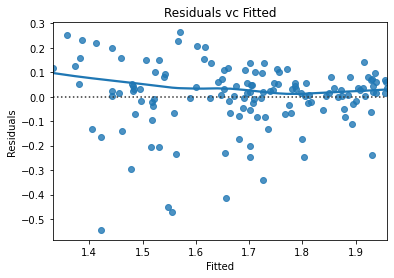

In [36]:
fig, ax = plt.subplots(1,1)

sns.residplot(res1.fittedvalues, res1.resid, lowess=True) #lowess shows the continuous blue line
ax.title.set_text('Residuals vc Fitted')
ax.set(xlabel = 'Fitted', ylabel='Residuals')

It didn't work very well. SO we'll do a Box-cox transformation and check the result.

In [37]:
from scipy.stats import boxcox

# Supondo que 'df' é o seu DataFrame e 'worldhappiness2022' é a coluna que você deseja transformar
# Certifique-se de que os valores são todos positivos, pois a transformação Box-Cox é aplicada a dados estritamente positivos.

# Criar uma cópia do DataFrame para evitar alterações indesejadas
df_transformed = df_model.copy()

# Aplicar a transformação Box-Cox à coluna 'worldhappiness2022'
df_transformed['trans_WorldHappiness2022'], lambda_value = boxcox(df['WorldHappiness2022'])

# 'lambda_value' é o parâmetro da transformação Box-Cox, você pode querer armazená-lo para reverter a transformação mais tarde, se necessário.

# Agora, 'df_transformed' contém a coluna 'worldhappiness2022' transformada usando a transformação Box-Cox


In [38]:
mod2 = smf.ols(formula= 'trans_WorldHappiness2022 ~ population_growthRate + Hdi2021', data= df_transformed)

# apply the model in dataset

res2 = mod2.fit()

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

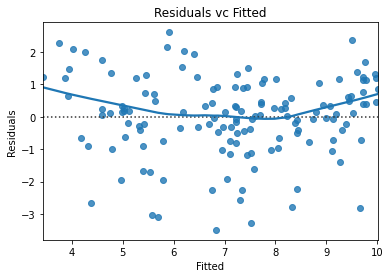

In [42]:
y= df_transformed['trans_WorldHappiness2022']
fig, ax = plt.subplots(1,1)

sns.residplot(res2.fittedvalues, res2.resid, lowess=True) #lowess shows the continuous blue line
ax.title.set_text('Residuals vc Fitted')
ax.set(xlabel = 'Fitted', ylabel='Residuals')

In [49]:
res1.resid.mean()

-9.606185035763766e-17

Although we can't ensure homoscedasticity, we are proceeding with the next steps and will evaluate the model afterward. We have opted to use the model after the log transformation because the residuals are closer to 0 compared to the other models.

### Residuals vs features

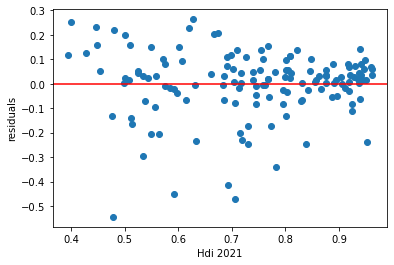

In [50]:
df_resid = df_model.copy()

# criando coluna com o valor dos residuos

df_resid['residuo']= res1.resid

plt.scatter(df_resid['Hdi2021'], df_resid['residuo'])
plt.axhline(0,color='red')
plt.xlabel('Hdi 2021');
plt.ylabel('residuals');


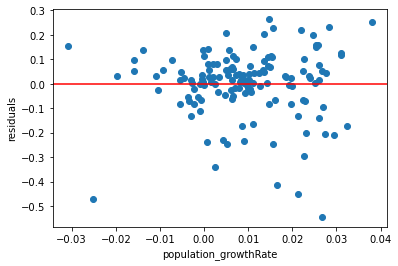

In [51]:
plt.scatter(df_resid['population_growthRate'], df_resid['residuo'])
plt.axhline(0,color='red')
plt.xlabel('population_growthRate');
plt.ylabel('residuals');

### 6) Autocorrelation

In [52]:
df_auto = res1.resid.reset_index().rename(columns={0: 'resid'})
df_auto

,index,resid
0,0,-0.233556
1,1,0.018736
2,2,0.037640
3,3,0.008346
4,4,0.024869
...,...,...
136,136,0.032042
137,137,0.071744
138,138,-0.065848
139,139,-0.031454


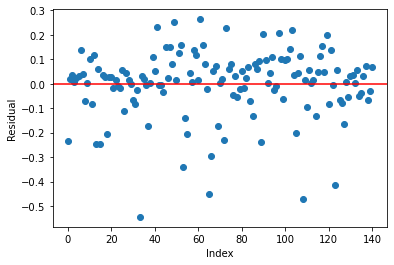

In [53]:
plt.scatter(df_auto['index'], df_auto['resid'])
plt.axhline(0, color='red')
plt.xlabel('Index');
plt.ylabel('Residual');

In [55]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res1.resid)

1.9155851137131892

### Residuals has normal distribution

<AxesSubplot:>

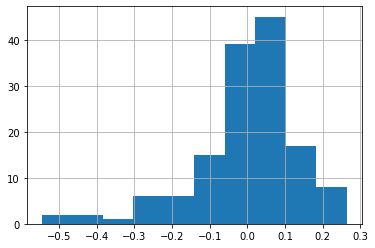

In [56]:
df_auto['resid'].hist()

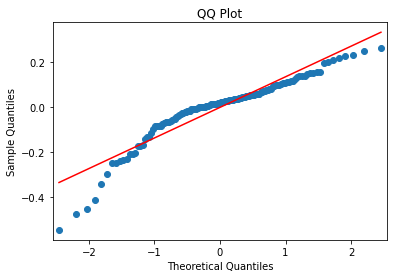

In [57]:
fig, ax = plt.subplots(1,1)
sm.ProbPlot(res1.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

In [58]:
print(res1.summary())

                              OLS Regression Results                              
Dep. Variable:     log_WorldHappiness2022   R-squared:                       0.598
Model:                                OLS   Adj. R-squared:                  0.593
Method:                     Least Squares   F-statistic:                     102.8
Date:                    Tue, 30 Jan 2024   Prob (F-statistic):           4.61e-28
Time:                            17:07:32   Log-Likelihood:                 81.166
No. Observations:                     141   AIC:                            -156.3
Df Residuals:                         138   BIC:                            -147.5
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
mod3 = smf.ols(formula= 'log_WorldHappiness2022 ~ population_growthRate + Hdi2021', data= df_model)

# apply the model in dataset

res1 = mod1.fit()